## Customer Personality Segmentation

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
customers_df = pd.read_csv('marketing_campaign.csv', sep='\t')
customers_df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


#### Shape

In [4]:
customers_df.shape

(2240, 29)

#### Columns

In [5]:
customers_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#### Categorical Columns

In [6]:
customers_df.select_dtypes(include='object').columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

#### Numerical Columns

In [7]:
customers_df.select_dtypes(include='number').columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

## Data Cleaning

#### Remove Duplicates

In [8]:
customers_df.duplicated().sum()

0

#### Missing Values

In [9]:
customers_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Rename Columns

In [10]:
customers_df.rename(columns={
    'Year_Birth':'Year_of_Birth','Kidhome': 'Kids_in_Home','Teenhome': 'Teens_in_Home', 'Dt_Customer':'Customer_Enroll_Date',
    'MntWines':'Wines_Amount', 'MntFruits':'Fruits_Amount','MntMeatProducts':'Meat_Prods_Amount','MntFishProducts':'Fish_Prods_Amount',
    'MntSweetProducts':'Sweet_Prods_Amount','MntGoldProds':'Gold_Prods_Amount', 'NumDealsPurchases':'Discounted_Purchases', 
    'NumWebPurchases':'Website_Purchases','NumCatalogPurchases':'Catalogue_Purchases', 'NumStorePurchases':'Store_Purchases',
    'NumWebVisitsMonth':'Website_Visits','Complain':'Is_Complained'
}, inplace=True)

In [11]:
customers_df.head(3)

,ID,Year_of_Birth,Education,Marital_Status,Income,Kids_in_Home,Teens_in_Home,Customer_Enroll_Date,Recency,Wines_Amount,...,Website_Visits,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Is_Complained,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


#### Features Extraction

In [12]:
customers_df['Age'] = customers_df['Year_of_Birth'].apply(lambda x: 2024 - x)

In [13]:
customers_df['Customer_Enroll_Year'] = pd.to_datetime(customers_df['Customer_Enroll_Date'],format="%d-%m-%Y").dt.year
customers_df['Years_With_Customer'] = customers_df['Customer_Enroll_Year'].apply(lambda x: 2024 - x)

In [14]:
customers_df['Total_Amount'] = np.sum(customers_df[['Wines_Amount','Fruits_Amount','Meat_Prods_Amount','Fish_Prods_Amount','Sweet_Prods_Amount','Gold_Prods_Amount']],
                                     axis = 1)

In [15]:
customers_df.head(3)

,ID,Year_of_Birth,Education,Marital_Status,Income,Kids_in_Home,Teens_in_Home,Customer_Enroll_Date,Recency,Wines_Amount,...,AcceptedCmp1,AcceptedCmp2,Is_Complained,Z_CostContact,Z_Revenue,Response,Age,Customer_Enroll_Year,Years_With_Customer,Total_Amount
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,67,2012,12,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,70,2014,10,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,59,2013,11,776


#### Drop Unwanted Columns

In [16]:
customers_df.drop(columns=['Year_of_Birth','Customer_Enroll_Date', 'Z_Revenue', 'Z_CostContact'], inplace = True)

#### Filling Nulls

In [17]:
customers_df['Income'].fillna(customers_df['Income'].mean(), inplace=True)

## EDA

#### Columns : 'Education', 'Marital_Status', 'Kids_in_Home', 'Teens_in_Home', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Is_Complained' 'Response', 'Customer_Enroll_Year',

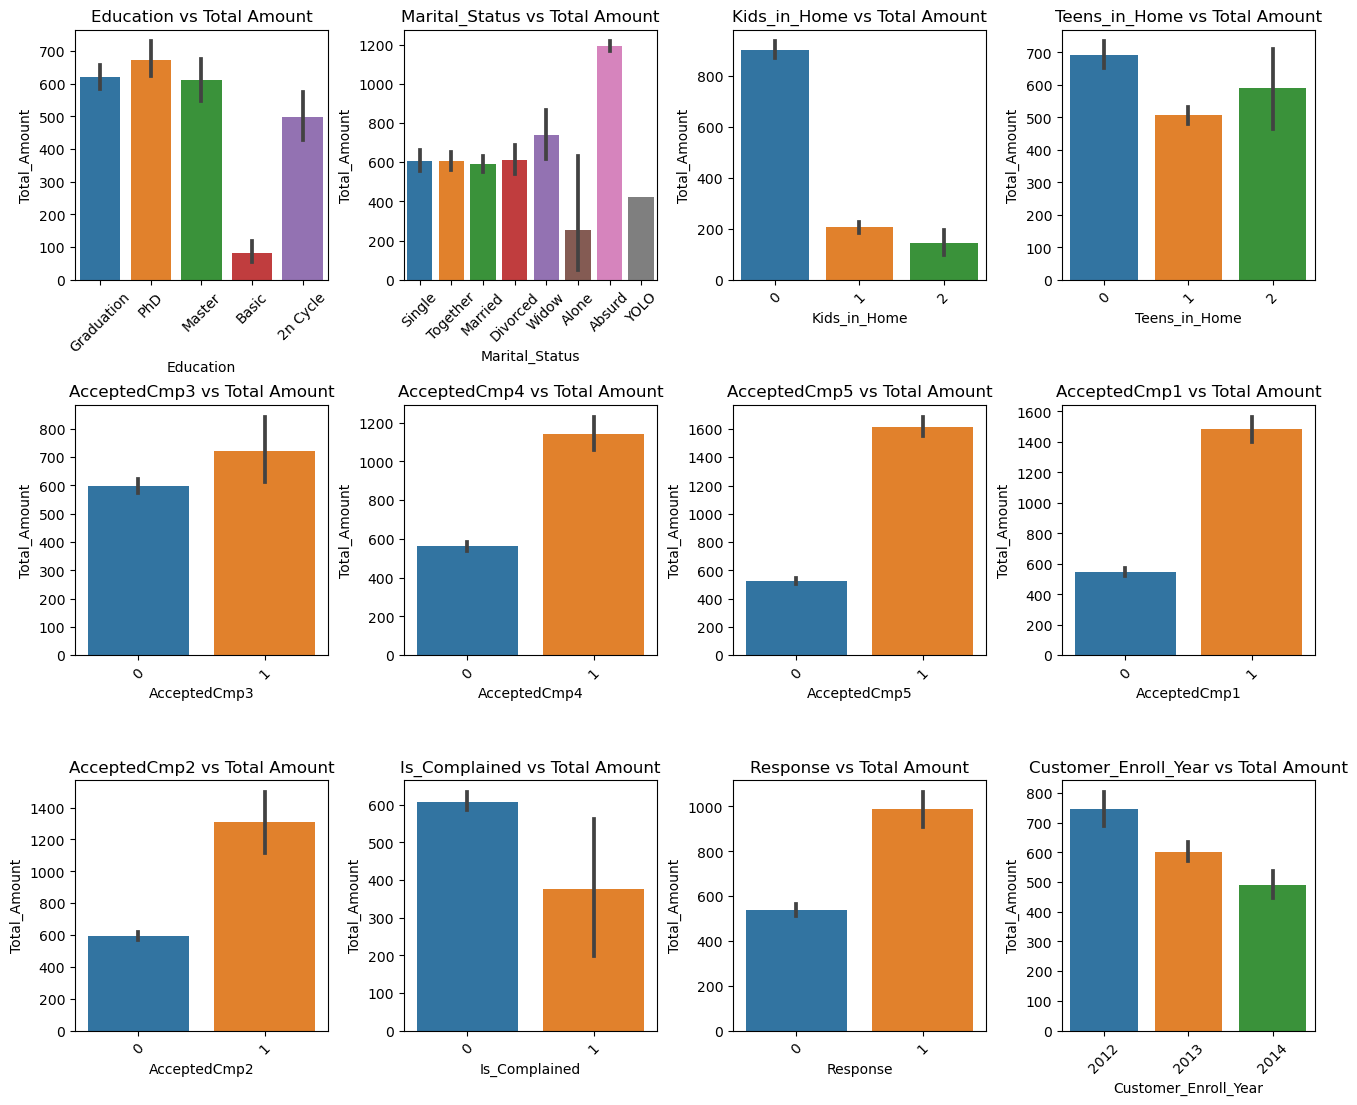

In [18]:
columns = ['Education', 'Marital_Status', 'Kids_in_Home', 'Teens_in_Home', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
           'AcceptedCmp2', 'Is_Complained', 'Response', 'Customer_Enroll_Year']

plt.subplots(3,4,figsize=(16, 13))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.barplot(x = i, y = 'Total_Amount', data = customers_df)
    plt.title(f'{i} vs Total Amount')
    plt.xticks(rotation = 45)
    k += 1

plt.show()

#### Columns : 'Income', 'Recency', 'Wines_Amount', 'Fruits_Amount', 'Meat_Prods_Amount', 'Fish_Prods_Amount', 'Sweet_Prods_Amount'  'Gold_Prods_Amount', 'Discounted_Purchases', 'Website_Purchases    'Catalogue_Purchases', 'Store_Purchases', 'Website_Visit, 'Age', 'Years_With_Customer'  'Total_Amount's',

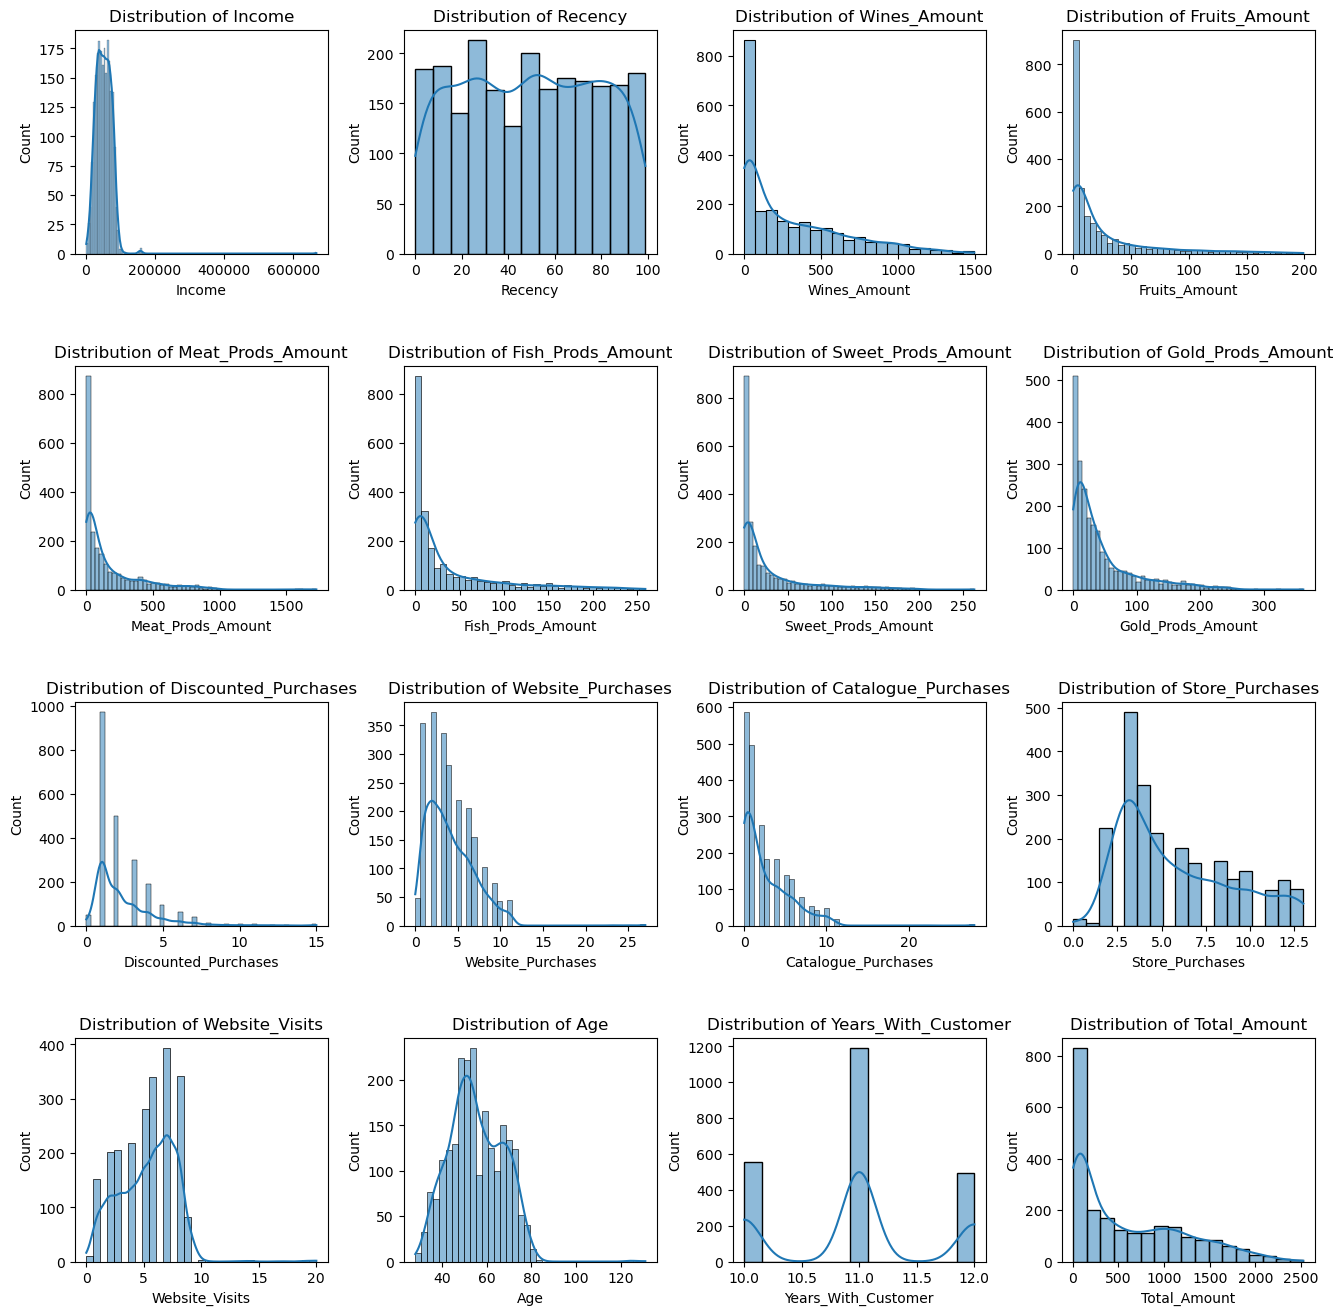

In [19]:
columns = ['Income', 'Recency', 'Wines_Amount', 'Fruits_Amount', 'Meat_Prods_Amount', 'Fish_Prods_Amount', 'Sweet_Prods_Amount', 'Gold_Prods_Amount',
           'Discounted_Purchases', 'Website_Purchases', 'Catalogue_Purchases', 'Store_Purchases', 'Website_Visits', 'Age', 'Years_With_Customer',
           'Total_Amount']
 
plt.subplots(4,4,figsize=(16, 16))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

k = 1
for i in columns:
    plt.subplot(4,4,k)
    sns.histplot(x = i, data = customers_df, kde = True)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

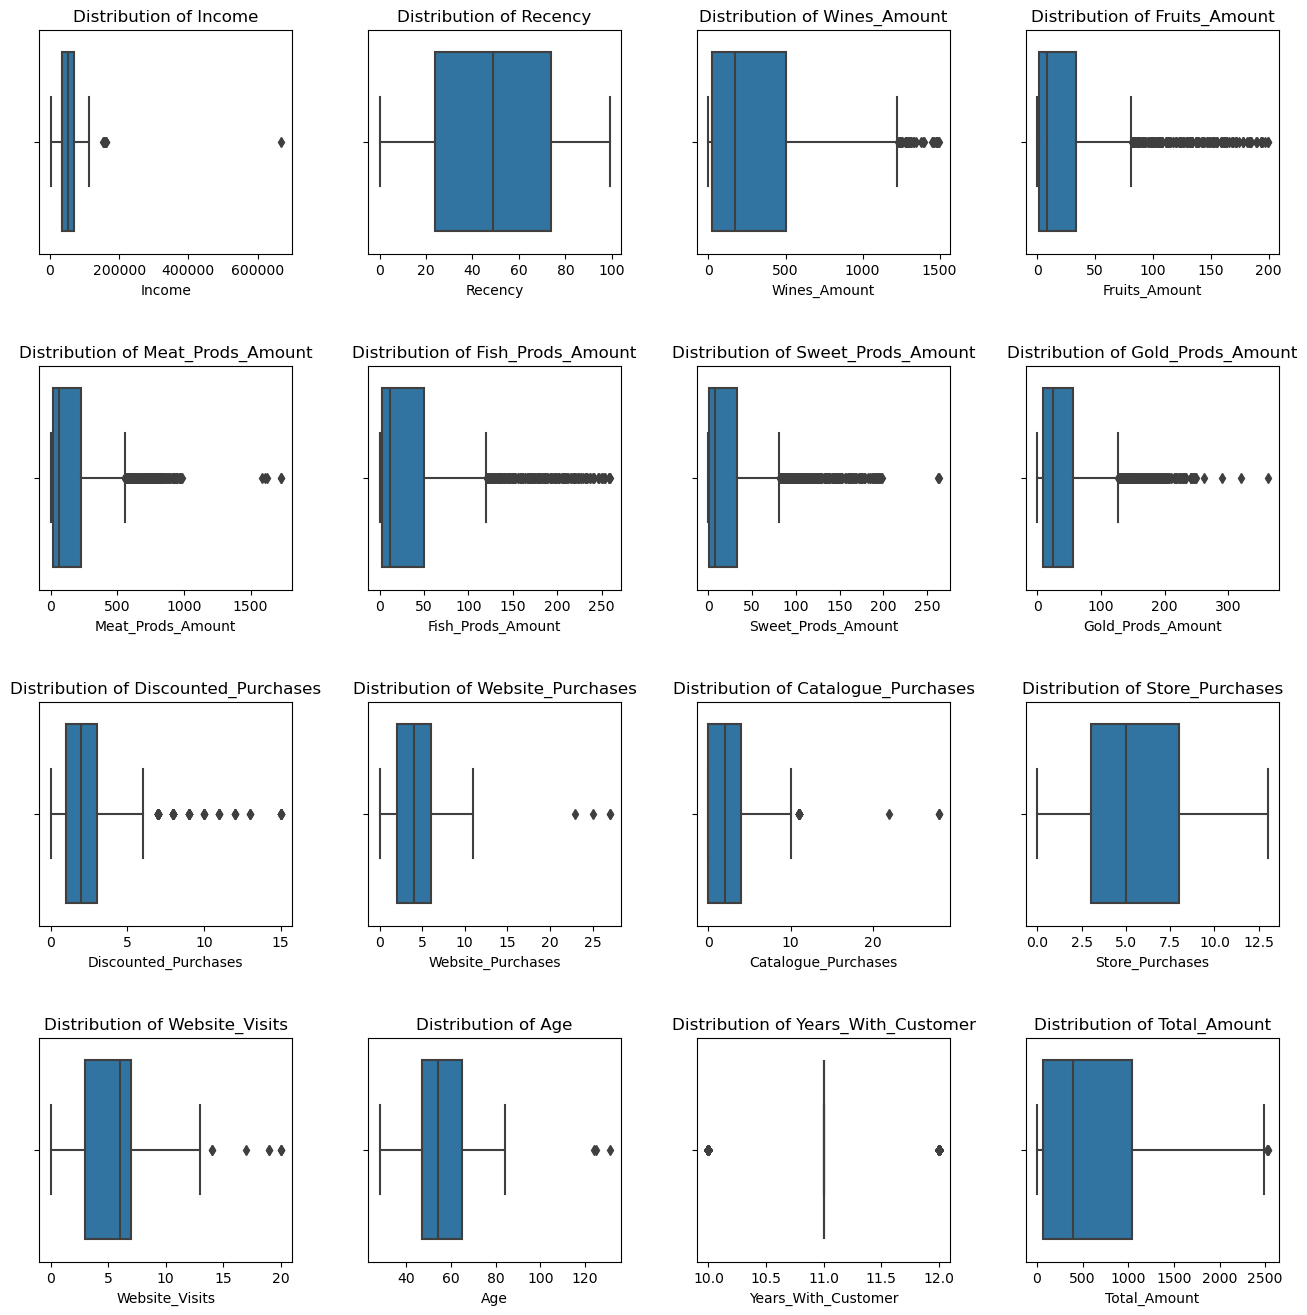

In [20]:
columns = ['Income', 'Recency', 'Wines_Amount', 'Fruits_Amount', 'Meat_Prods_Amount', 'Fish_Prods_Amount', 'Sweet_Prods_Amount', 'Gold_Prods_Amount',
           'Discounted_Purchases', 'Website_Purchases', 'Catalogue_Purchases', 'Store_Purchases', 'Website_Visits', 'Age', 'Years_With_Customer',
           'Total_Amount']
 
plt.subplots(4,4,figsize=(16, 16))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

k = 1
for i in columns:
    plt.subplot(4,4,k)
    sns.boxplot(x = i, data = customers_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

## Statistics

#### Quantiles

In [21]:
customers_df.describe()

,ID,Income,Kids_in_Home,Teens_in_Home,Recency,Wines_Amount,Fruits_Amount,Meat_Prods_Amount,Fish_Prods_Amount,Sweet_Prods_Amount,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Is_Complained,Response,Age,Customer_Enroll_Year,Years_With_Customer,Total_Amount
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,2013.028125,10.971875,605.798214
std,3246.662198,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.684554,0.684554,602.249288
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,2012.000000,10.000000,5.000000
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,2013.000000,11.000000,68.750000
50%,5458.500000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,2013.000000,11.000000,396.000000
75%,8427.750000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,2013.000000,11.000000,1045.500000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2014.000000,12.000000,2525.000000


#### Correlations

Text(0.5, 1.0, 'Correlations')

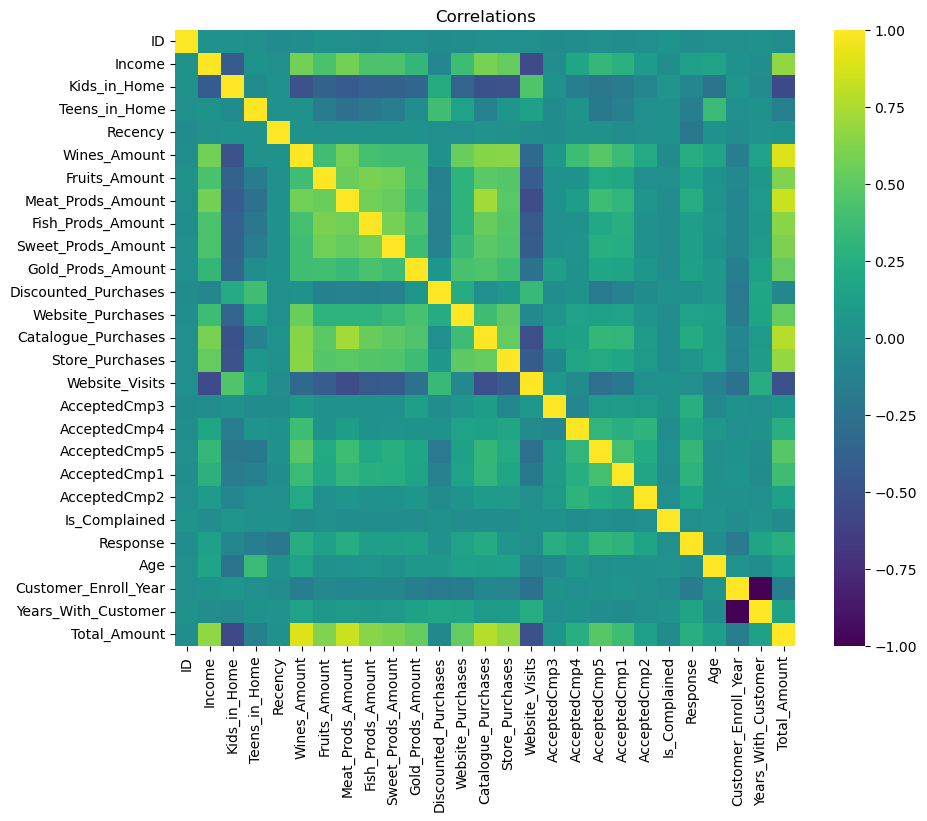

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data = customers_df.select_dtypes(include='number').corr(), annot=False, cmap = 'viridis')
plt.title('Correlations')

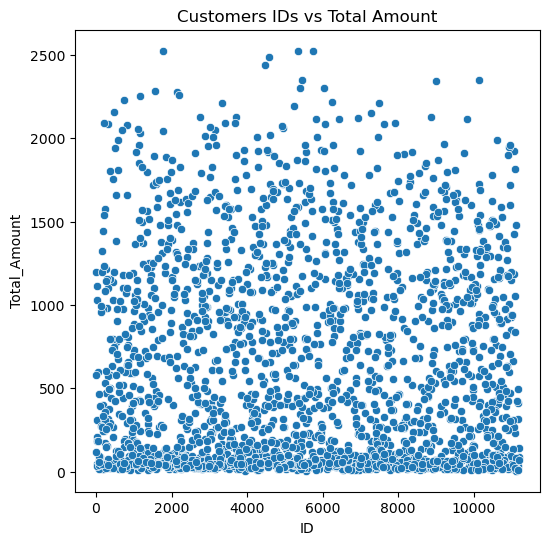

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'ID', y = 'Total_Amount', data = customers_df)
plt.title('Customers IDs vs Total Amount')
plt.show()

## Data Preprocessing

#### Column Transformer

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('Encoder', OrdinalEncoder(categories=[['Basic','2n Cycle','Graduation','Master','PhD'],[10,11,12]]), 
                                      ['Education','Years_With_Customer']),
                                     ('OneHot', OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),
                                      ['Marital_Status','Customer_Enroll_Year']),
                                     ('Pow_Transformer',PowerTransformer(),['Wines_Amount','Fruits_Amount','Meat_Prods_Amount','Fish_Prods_Amount',
                                                                            'Sweet_Prods_Amount','Gold_Prods_Amount','Discounted_Purchases']),
                                     ('Rob_Scaler',RobustScaler(),['Income','Website_Purchases','Catalogue_Purchases','Website_Visits','Age']),
                                     ('Std_Scaler',StandardScaler(),['Recency','Store_Purchases','Total_Amount'])],
                       remainder='passthrough', sparse_threshold=0)
ct

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('Encoder',
                                 OrdinalEncoder(categories=[['Basic',
                                                             '2n Cycle',
                                                             'Graduation',
                                                             'Master', 'PhD'],
                                                            [10, 11, 12]]),
                                 ['Education', 'Years_With_Customer']),
                                ('OneHot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Marital_Status', 'Customer_Enroll_Year']),
                                ('Pow_Transformer', PowerTransformer(),
                                 ['Wines_Amount', 'Fruits_Amount',
                                  'Meat_Prods_Amount', 'Fish_Prods_Amount',
                                  'Sweet_Prods_Amount', 'Gold_Prods_Amount',
                                  'Discounted_Purchases']),
                                ('Rob_Scaler', RobustScaler(),
                                 ['Income', 'Website_Purchases',
                                  'Catalogue_Purchases', 'Website_Visits',
                                  'Age']),
                                ('Std_Scaler', StandardScaler(),
                                 ['Recency', 'Store_Purchases',
                                  'Total_Amount'])])

## Data Splitting

In [30]:
X = customers_df.drop(columns='ID')

## Model Selection

In [31]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, MeanShift, AgglomerativeClustering, BisectingKMeans
from sklearn.cluster import DBSCAN, OPTICS, Birch

models = {
    'kmeans': KMeans(n_clusters=3),
    'minibatch': MiniBatchKMeans(n_clusters=3),
    'affinity_prop': AffinityPropagation(),
    'agglomerative': AgglomerativeClustering(n_clusters=3),
    'bisecting': BisectingKMeans(n_clusters=3),
    'optics': OPTICS(),
    'birch': Birch(n_clusters=3)
}

In [32]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X_preprocessed = ct.fit_transform(X)
for i in models.keys():
    model = models[i].fit(X_preprocessed)
    sil_score = silhouette_score(X_preprocessed, model.labels_)
    cal_har_score = calinski_harabasz_score(X_preprocessed, model.labels_)
    dav_bou_score = davies_bouldin_score(X_preprocessed, model.labels_)
    print(f'{i}--> silhouette_score: {sil_score}, calinski_harabasz_score: {cal_har_score}, davies_bouldin_score: {dav_bou_score}')


kmeans--> silhouette_score: 0.18470247751149596, calinski_harabasz_score: 718.4122249828372, davies_bouldin_score: 1.902675992659945
minibatch--> silhouette_score: 0.19007583099035646, calinski_harabasz_score: 713.2714221342909, davies_bouldin_score: 1.9289874243988365
affinity_prop--> silhouette_score: 0.06329346318753303, calinski_harabasz_score: 39.641226906493586, davies_bouldin_score: 2.056586411296205
agglomerative--> silhouette_score: 0.14928225669027664, calinski_harabasz_score: 638.9279346584985, davies_bouldin_score: 2.056212943364424
bisecting--> silhouette_score: 0.1896713713688126, calinski_harabasz_score: 652.7782797207415, davies_bouldin_score: 2.156831240203534
optics--> silhouette_score: -0.35683703562057956, calinski_harabasz_score: 5.382442293098853, davies_bouldin_score: 1.4260206580417851
birch--> silhouette_score: 0.15251084923342378, calinski_harabasz_score: 647.764618892941, davies_bouldin_score: 2.0620182329710515


## Model Building

In [33]:
model = KMeans(n_clusters=3)
model.fit(X_preprocessed)

KMeans(n_clusters=3)

## Model Evaluation

In [34]:
y_pred = model.predict(X_preprocessed)
score = calinski_harabasz_score(X_preprocessed, model.labels_)
print(f'score: {score}')
print(model.labels_)

score: 718.4093856689767
[2 0 2 ... 2 2 1]


In [35]:
customers_df['Clusters'] = y_pred

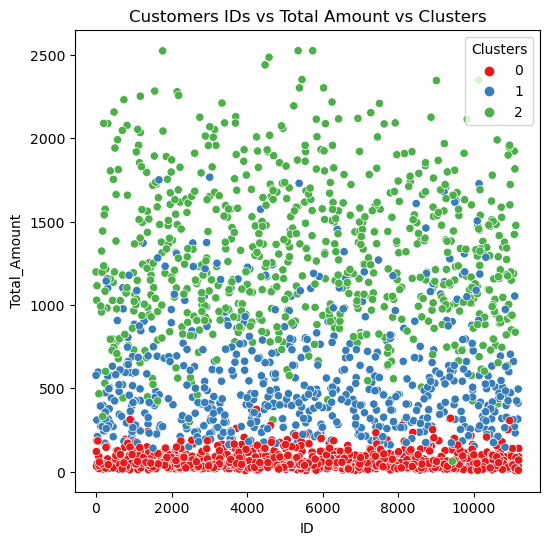

In [37]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'ID', y = 'Total_Amount', data = customers_df, hue = 'Clusters', palette='Set1')
plt.title('Customers IDs vs Total Amount vs Clusters')
plt.show()